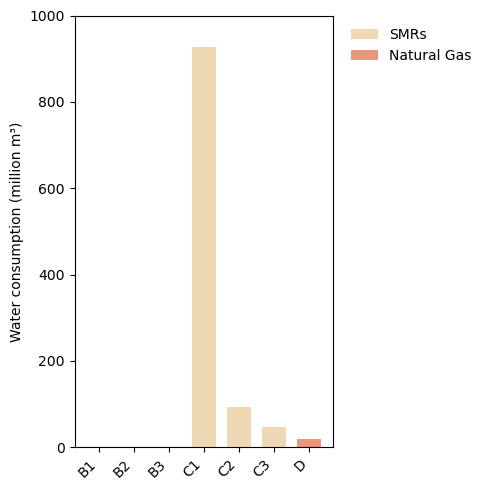

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ── 1) LOAD & FILTER YEARLY RESULTS ──────────────────────────────────────
csv_path = "/Users/amirgazar/Documents/GitHub/Decarbonization-Tradeoffs/2 Generation Expansion Model/5 Dispatch Curve/4 Final Results/1 Comprehensive Days Summary Results/Yearly_Results.csv"
yr = pd.read_csv(csv_path)
yr = yr[yr['Year'].isin([2025, 2050])]

# ── 2) COMPUTE Δ GENERATION PER SIMULATION & PATHWAY ─────────────────────
gen_cols = ['SMR_TWh', 'New_Fossil_Fuel_TWh']
grp = (
    yr
    .groupby(['Simulation', 'Pathway', 'Year'])[gen_cols]
    .sum()
    .unstack('Year')
)
delta = pd.DataFrame({
    'SMR_TWh':             grp['SMR_TWh', 2050] - grp['SMR_TWh', 2025],
    'New_Fossil_Fuel_TWh': grp['New_Fossil_Fuel_TWh', 2050] - grp['New_Fossil_Fuel_TWh', 2025],
}).dropna(how='all')

# ── 3) CONVERT Δ TWh → Δ WATER USE IN MILLION GALLONS ────────────────────
water_mid = {
    'SMR_TWh':             np.mean([740]),   # gal per MWh midpoint
    'New_Fossil_Fuel_TWh': np.mean([15, 50])
}
water_mgal = delta.mul(pd.Series(water_mid))  
water_mgal.columns = ['SMR', 'New NG']

# ── 4) DROP PATHWAY A & CALCULATE MEAN BY PATHWAY ────────────────────────
water_mgal = water_mgal.loc[water_mgal.index.get_level_values('Pathway') != 'A']
mean_by_path = water_mgal.groupby('Pathway').mean()

# ── 5) CONVERT MILLION GALLONS → MILLION CUBIC METERS ────────────────────
mean_by_path_m3_million = mean_by_path * 0.00378541

# ── 6) PLOT STACKED BAR CHART WITH Y-LIM ─────────────────────────────────
fig, ax = plt.subplots(figsize=(5, 5))

colors = {"SMR": "#EFD9B4", "New NG": "#E9967A"}
legend_mapping = {"SMR": "SMRs", "New NG": "Natural Gas"}

bottom = np.zeros(len(mean_by_path_m3_million))
x = np.arange(len(mean_by_path_m3_million))

for tech in mean_by_path_m3_million.columns:
    vals = mean_by_path_m3_million[tech].values
    ax.bar(
        x, vals,
        bottom=bottom,
        color=colors[tech],
        width=0.7,
        label=legend_mapping[tech]
    )
    bottom += vals

ax.set_xticks(x)
ax.set_xticklabels(mean_by_path_m3_million.index, rotation=45, ha='right')
ax.set_ylabel('Water consumption (million m³)')

ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), frameon=False)


ax.set_ylim(0, 1000)

plt.tight_layout()
plt.savefig('water_consumption.png', dpi=300,
            bbox_inches='tight', pad_inches=0.1)
plt.show()


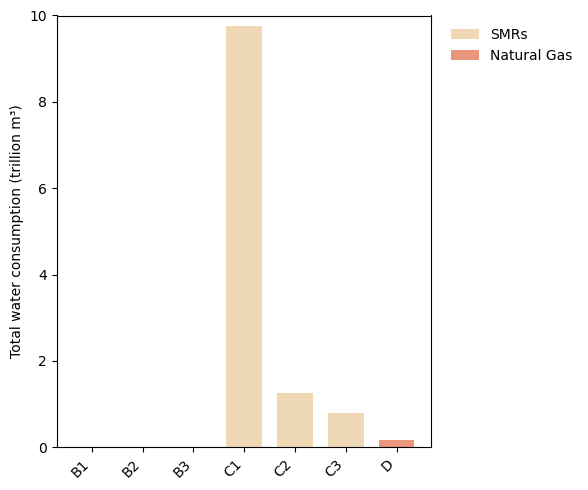

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ── 1) LOAD & FILTER ALL YEARS 2025–2050 ─────────────────────────────────
csv_path = "/Users/amirgazar/Documents/GitHub/Decarbonization-Tradeoffs/2 Generation Expansion Model/5 Dispatch Curve/4 Final Results/1 Comprehensive Days Summary Results/Yearly_Results.csv"
yr = pd.read_csv(csv_path)
yr = yr[yr['Year'].between(2025, 2050)]

# ── 2) SUM GENERATION BY PATHWAY × YEAR ──────────────────────────────────
gen_cols = ['SMR_TWh', 'New_Fossil_Fuel_TWh']
path_year = yr.groupby(['Pathway', 'Year'])[gen_cols].sum()

# ── 3) SUM ACROSS YEARS TO GET TOTAL PER PATHWAY ─────────────────────────
path_total = path_year.groupby('Pathway')[gen_cols].sum()

# ── 4) CONVERT TWh → water use (million gallons) ──────────────────────────
water_mid = {
    'SMR_TWh':             np.mean([740]),    # gal per MWh
    'New_Fossil_Fuel_TWh': np.mean([15, 50])
}
water_mgal = path_total.mul(pd.Series(water_mid))

# ── 5) CONVERT Mgal → trillion m³ ─────────────────────────────────────────
water_m3 = water_mgal * 0.00378541 /1e6
water_m3.columns = ['SMR', 'New NG']

# ── (optional) DROP PATHWAY A if you don’t want it
water_m3 = water_m3.loc[water_m3.index != 'A']

# ── 6) PLOT STACKED BAR CHART ─────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(6, 5))

colors = {"SMR": "#EFD9B4", "New NG": "#E9967A"}
legend_mapping = {"SMR": "SMRs", "New NG": "Natural Gas"}

bottom = np.zeros(len(water_m3))
x = np.arange(len(water_m3))

for tech in water_m3.columns:
    vals = water_m3[tech].values
    ax.bar(
        x, vals,
        bottom=bottom,
        color=colors[tech],
        width=0.7,
        label=legend_mapping[tech]
    )
    bottom += vals

ax.set_xticks(x)
ax.set_xticklabels(water_m3.index, rotation=45, ha='right')
ax.set_ylabel('Total water consumption (trillion m³)')
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), frameon=False)
ax.set_ylim(0, 10)

plt.tight_layout()
plt.savefig('water_consumption_by_pathway.png', dpi=300,
            bbox_inches='tight', pad_inches=0.1)
plt.show()


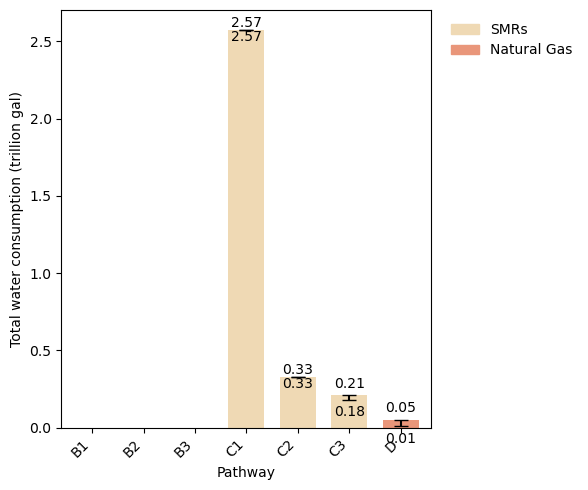

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ── 1) LOAD & FILTER ALL YEARS 2025–2050 ─────────────────────────────────
csv_path = "/Users/amirgazar/Documents/GitHub/Decarbonization-Tradeoffs/2 Generation Expansion Model/5 Dispatch Curve/4 Final Results/1 Comprehensive Days Summary Results/Yearly_Results.csv"
yr = pd.read_csv(csv_path)
yr = yr[yr['Year'].between(2025, 2050)]

# ── 2) SUM GENERATION BY SIMULATION × PATHWAY (OVER ALL YEARS) ────────────
gen_cols = ['SMR_TWh', 'New_Fossil_Fuel_TWh']
sim_path = (
    yr
    .groupby(['Simulation','Pathway'])[gen_cols]
    .sum()
    .reset_index()
)
sim_path = sim_path[sim_path['Pathway'] != 'A']  # drop A if present
sim_path = sim_path.set_index(['Simulation','Pathway'])

# ── 3) WATER‐USE FACTORS (gal MWh⁻¹ midpoints) ─────────────────────────────
water_mid = {
    'SMR_TWh':             740,               # water-cooled SMRs
    'New_Fossil_Fuel_TWh': np.mean([15,50])   # dry-cooled gas
}

# ── 4) COMPUTE WATER USE PER SIM & PATHWAY ───────────────────────────────
# (TWh)*(gal/MWh) → million gallons
water_mgal = sim_path.mul(pd.Series(water_mid))
water_tr3 = water_mgal / 1e6  # trillion gallons

# ── 5) FOR EACH PATHWAY: MEAN, MIN & MAX TOTAL WATER ───────────────────────
total_by_sim = water_tr3.sum(axis=1)  # sum across the two tech cols
stats = total_by_sim.groupby('Pathway').agg(['mean','min','max'])
mean_total = stats['mean']
min_total  = stats['min']
max_total  = stats['max']

# ── 6) MEAN PER-TECH CONTRIBUTION ─────────────────────────────────────────
mean_tech = water_tr3.groupby('Pathway').mean()

# ── 7) PLOT ───────────────────────────────────────────────────────────────
colors = {"SMR_TWh":"#EFD9B4","New_Fossil_Fuel_TWh":"#E9967A"}
legend_map = {"SMR_TWh":"SMRs","New_Fossil_Fuel_TWh":"Natural Gas"}

ax = mean_tech.plot(
    kind='bar',
    stacked=True,
    color=[colors[t] for t in mean_tech.columns],
    figsize=(6,5),
    width=0.7
)
ax.set_xticklabels(mean_tech.index, rotation=45, ha='right')
ax.set_ylabel('Total water consumption (trillion gal)')

# prepare positions and asymmetric error bars
x = np.arange(len(mean_total))
err_lower = mean_total - min_total
err_upper = max_total - mean_total
yerr = np.vstack([err_lower.values, err_upper.values])

# mask out B1, B2, B3 for error bars & annotations
mask = ~mean_total.index.isin(['B1','B2','B3'])
x_err = x[mask]
mean_err = mean_total.values[mask]
err_low = err_lower.values[mask]
err_up  = err_upper.values[mask]
yerr_masked = np.vstack([err_low, err_up])

# overlay error bars only for unmasked pathways
ax.errorbar(
    x_err, mean_err,
    yerr=yerr_masked,
    fmt='none', ecolor='black',
    capsize=5
)

# annotate min & max with increased offset (use 10% of full range)
for xi, mn, mx, lo, hi in zip(x_err, min_total[mask], max_total[mask], err_low, err_up):
    offset = (hi + lo) * 1
    ax.text(xi, mx + offset, f"{mx:.2f}", ha='center', va='bottom')
    ax.text(xi, mn - offset, f"{mn:.2f}", ha='center', va='top')

# legend
handles = [
    plt.matplotlib.patches.Patch(color=colors[t], label=legend_map[t])
    for t in mean_tech.columns
]
ax.legend(handles=handles,
          loc='upper left',
          bbox_to_anchor=(1.02,1),
          frameon=False)

plt.tight_layout()
plt.savefig('water_consumption.png', dpi=300,
            bbox_inches='tight', pad_inches=0.1)
plt.show()


In [3]:
water_mgal

SMR_TWh  New_Fossil_Fuel_TWh
Simulation Pathway                                   
1          B1       0.000000e+00             0.000000
           B2       0.000000e+00             0.000000
           B3       0.000000e+00             0.000000
           C1       2.574543e+06             0.000000
           C2       3.310175e+05             0.000000
...                          ...                  ...
1010       B3       0.000000e+00             0.000000
           C1       2.574543e+06             0.000000
           C2       3.310175e+05             0.000000
           C3       2.084186e+05             0.000000
           D        0.000000e+00         46832.069115

[7007 rows x 2 columns]

In [5]:
sim_path

SMR_TWh  New_Fossil_Fuel_TWh
Simulation Pathway                                 
1          B1          0.00000             0.000000
           B2          0.00000             0.000000
           B3          0.00000             0.000000
           C1       3479.11200             0.000000
           C2        447.32088             0.000000
...                        ...                  ...
1010       B3          0.00000             0.000000
           C1       3479.11200             0.000000
           C2        447.32088             0.000000
           C3        281.64672             0.000000
           D           0.00000          1440.986742

[7007 rows x 2 columns]